<a href="https://colab.research.google.com/github/BenBeharUNSW/Project/blob/main/Team_N_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Read Data and disply basic statistics

In [ ]:
# Read the CSV file
data = pd.read_csv('totaldemand_nsw.csv')

# Convert 'DATETIME' to datetime format
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

# Display the first few rows of the dataframe
print(data.head())

# Basic statistics of TOTALDEMAND
print("\nBasic Statistics of TOTALDEMAND:")
print(data['TOTALDEMAND'].describe())



             DATETIME  TOTALDEMAND REGIONID
0 2010-01-01 00:00:00      8038.00     NSW1
1 2010-01-01 00:30:00      7809.31     NSW1
2 2010-01-01 01:00:00      7483.69     NSW1
3 2010-01-01 01:30:00      7117.23     NSW1
4 2010-01-01 02:00:00      6812.03     NSW1

Basic Statistics of TOTALDEMAND:
count    196513.000000
mean       8113.145859
std        1299.532774
min        5074.630000
25%        7150.070000
50%        8053.230000
75%        8958.550000
max       14579.860000
Name: TOTALDEMAND, dtype: float64


Group data by days

In [ ]:

# Group by date (day) and calculate the average demand
daily_average_demand = data.groupby(data['DATETIME'].dt.date)['TOTALDEMAND'].mean().reset_index()

# Rename columns for clarity
daily_average_demand.columns = ['DATE', 'AVERAGE_DEMAND']
daily_average_demand['DATE'] = pd.to_datetime(daily_average_demand['DATE'])

# Display the first few rows of the resulting dataframe
print(daily_average_demand.head())


        DATE  AVERAGE_DEMAND
0 2010-01-01     7801.352917
1 2010-01-02     9565.073542
2 2010-01-03     8560.798958
3 2010-01-04     8517.540000
4 2010-01-05     7984.952083


Plot daily data

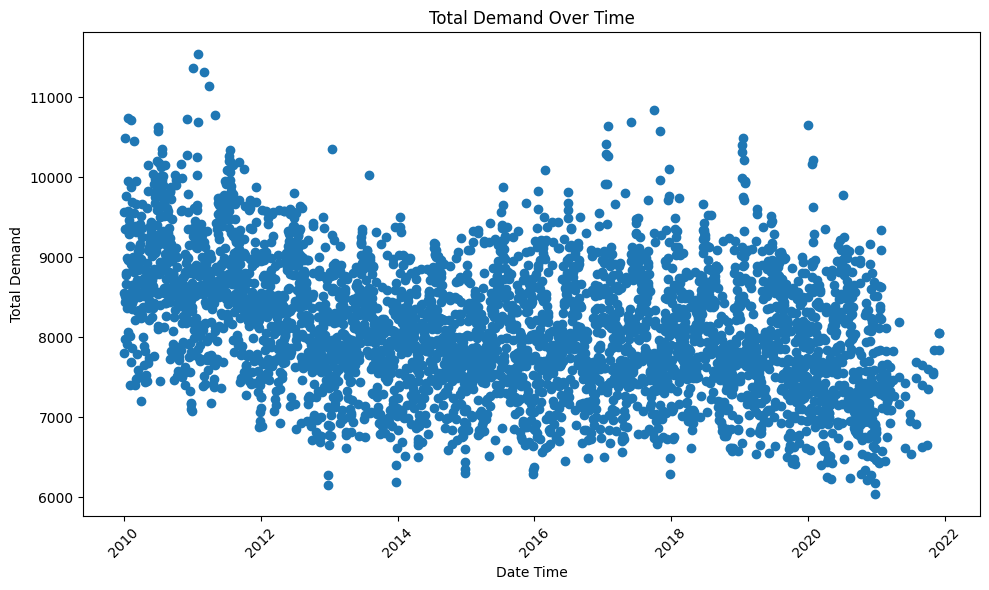

In [ ]:
# Plotting TOTALDEMAND over time
plt.figure(figsize=(10, 6))
plt.scatter(daily_average_demand['DATE'], daily_average_demand['AVERAGE_DEMAND'])
plt.title('Total Demand Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Year selection for plot

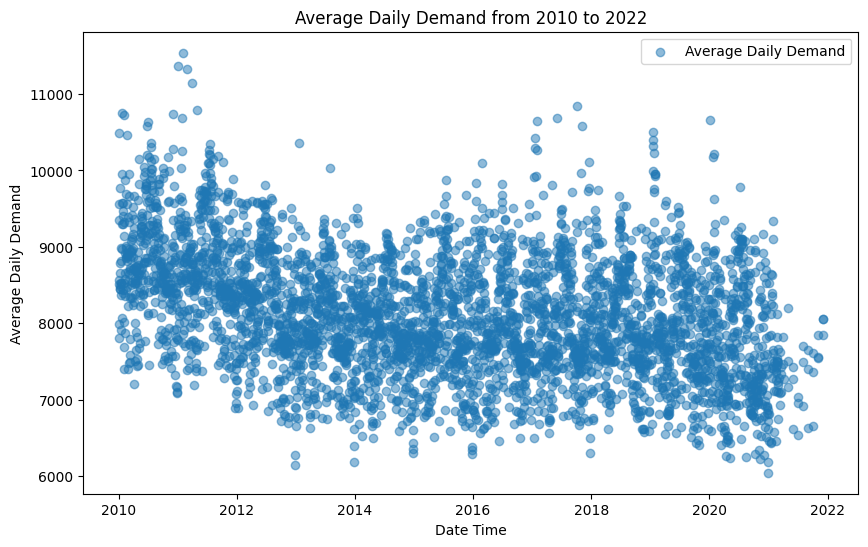

In [ ]:
# Define your start and end years here
start_year = 2010  # Example: 2020
end_year = 2022    # Example: 2022

# Filter the data to include only the rows within the specified period
filtered_data = daily_average_demand[(daily_average_demand['DATE'].dt.year >= start_year) & (daily_average_demand['DATE'].dt.year <= end_year)]

# Using scatter plot for TOTALDEMAND over the specified time period
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['DATE'], filtered_data['AVERAGE_DEMAND'], label='Average Daily Demand', alpha=0.5)
plt.title(f'Average Daily Demand from {start_year} to {end_year}')
plt.xlabel('Date Time')
plt.ylabel('Average Daily Demand')
plt.legend()
plt.show()

day / night grouping

In [ ]:
# Function to classify each row as 'day' or 'night'
def classify_day_night(row):

    # Define the start and end times for the 'night' period
    night_start = row.replace(hour=20, minute=0, second=0)  # 8:00 PM
    '''
    night_end = row + pd.Timedelta(days=1)  # Adding a day
    night_end = night_end.replace(hour=7, minute=30, second=0)  # Setting to 7:30 AM next day
    '''
    night_end = row.replace(hour=7, minute=30, second=0)  #7:30 AM

    # Define the start and end times for the 'day' period (for clarity and completeness)
    day_start = row.replace(hour=8, minute=0, second=0)  # 8:00 AM
    day_end = row.replace(hour=19, minute=30, second=0)  # 7:30 PM

    # Classify as 'night' or 'day'
    if row >= night_start or row < night_end:
        return 'night'
    elif row >= day_start and row <= day_end:
        return 'day'
    else:
        # This case handles the hours between 7:30 PM and 8:00 PM as neither day nor night
        return 'none'

# Apply the classification function to each row
data['Period'] = data['DATETIME'].apply(classify_day_night)

# Filter out the 'none' classifications if any
data = data[data['Period'] != 'none']

# Group by date and period, then sum the TOTALDEMAND for each group
grouped_data = data.groupby([data['DATETIME'].dt.date, 'Period'])['TOTALDEMAND'].mean().reset_index(name='AverageDemand')

print(grouped_data)

        DATETIME Period  AverageDemand
0     2010-01-01    day    8345.483750
1     2010-01-01  night    7269.257391
2     2010-01-02    day   11005.657917
3     2010-01-02  night    8045.056087
4     2010-01-03    day    9542.680833
...          ...    ...            ...
8184  2021-12-01  night    7314.423913
8185  2021-12-02    day    8686.804167
8186  2021-12-02  night    7402.279130
8187  2021-12-03    day    8338.822500
8188  2021-12-03  night    7309.829565

[8189 rows x 3 columns]


Night over time

<ipython-input-11-92c71a67393a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night_data['DATETIME'] = pd.to_datetime(night_data['DATETIME'])


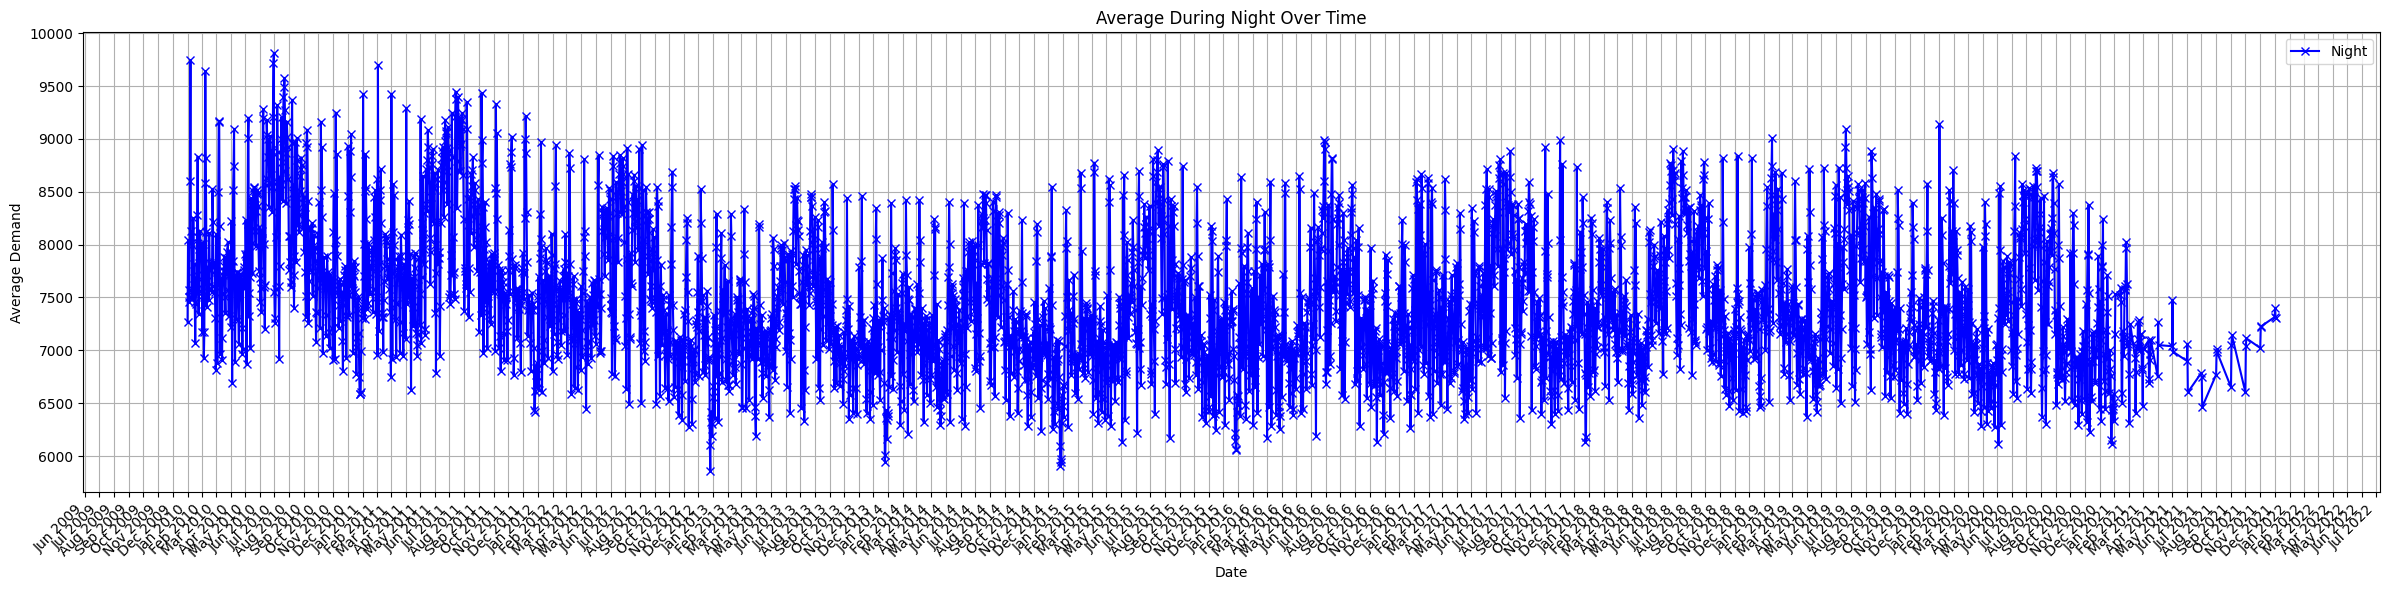

In [ ]:
night_data = grouped_data[grouped_data['Period'] == 'night']
night_data['DATETIME'] = pd.to_datetime(night_data['DATETIME'])
start_year = 2010  # Example: 2010
end_year = 2022    # Example: 2021

# Filter the data to include only the rows within the specified period
night_data = night_data[(night_data['DATETIME'].dt.year >= start_year) & (night_data['DATETIME'].dt.year <= end_year)]

# Plotting
plt.figure(figsize=(24, 6))

plt.plot(night_data['DATETIME'], night_data['AverageDemand'], label='Night', marker='x', linestyle='-', color='blue')

# Setting the locator for x-axis to display ticks for each month
locator = mdates.MonthLocator()  # Locator for every month
plt.gca().xaxis.set_major_locator(locator)

# Formatting the dates on the x-axis to show the month and year ('Jan 2020')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Auto-format the date labels to avoid overlap
plt.gcf().autofmt_xdate()


# Labeling and aesthetics
plt.title('Average During Night Over Time')
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Adds a grid for easier readability
plt.tight_layout()  # Adjust layout

plt.show()

Ploting day/night comperison

Period   DATETIME           day        night
0      2010-01-01   8345.483750  7269.257391
1      2010-01-02  11005.657917  8045.056087
2      2010-01-03   9542.680833  7502.679130
3      2010-01-04   9397.076667  7571.987391
4      2010-01-05   8508.114167  7461.031739
Period   DATETIME           day        night
0      2010-01-01   8345.483750  7269.257391
1      2010-01-02  11005.657917  8045.056087
2      2010-01-03   9542.680833  7502.679130
3      2010-01-04   9397.076667  7571.987391
4      2010-01-05   8508.114167  7461.031739
..            ...           ...          ...
360    2010-12-27   7599.800417  6589.710870
361    2010-12-28   7544.936667  6607.995217
362    2010-12-29   8576.850000  6990.680435
363    2010-12-30   9327.770000  7308.980435
364    2010-12-31   9917.261667  7406.747391

[365 rows x 3 columns]


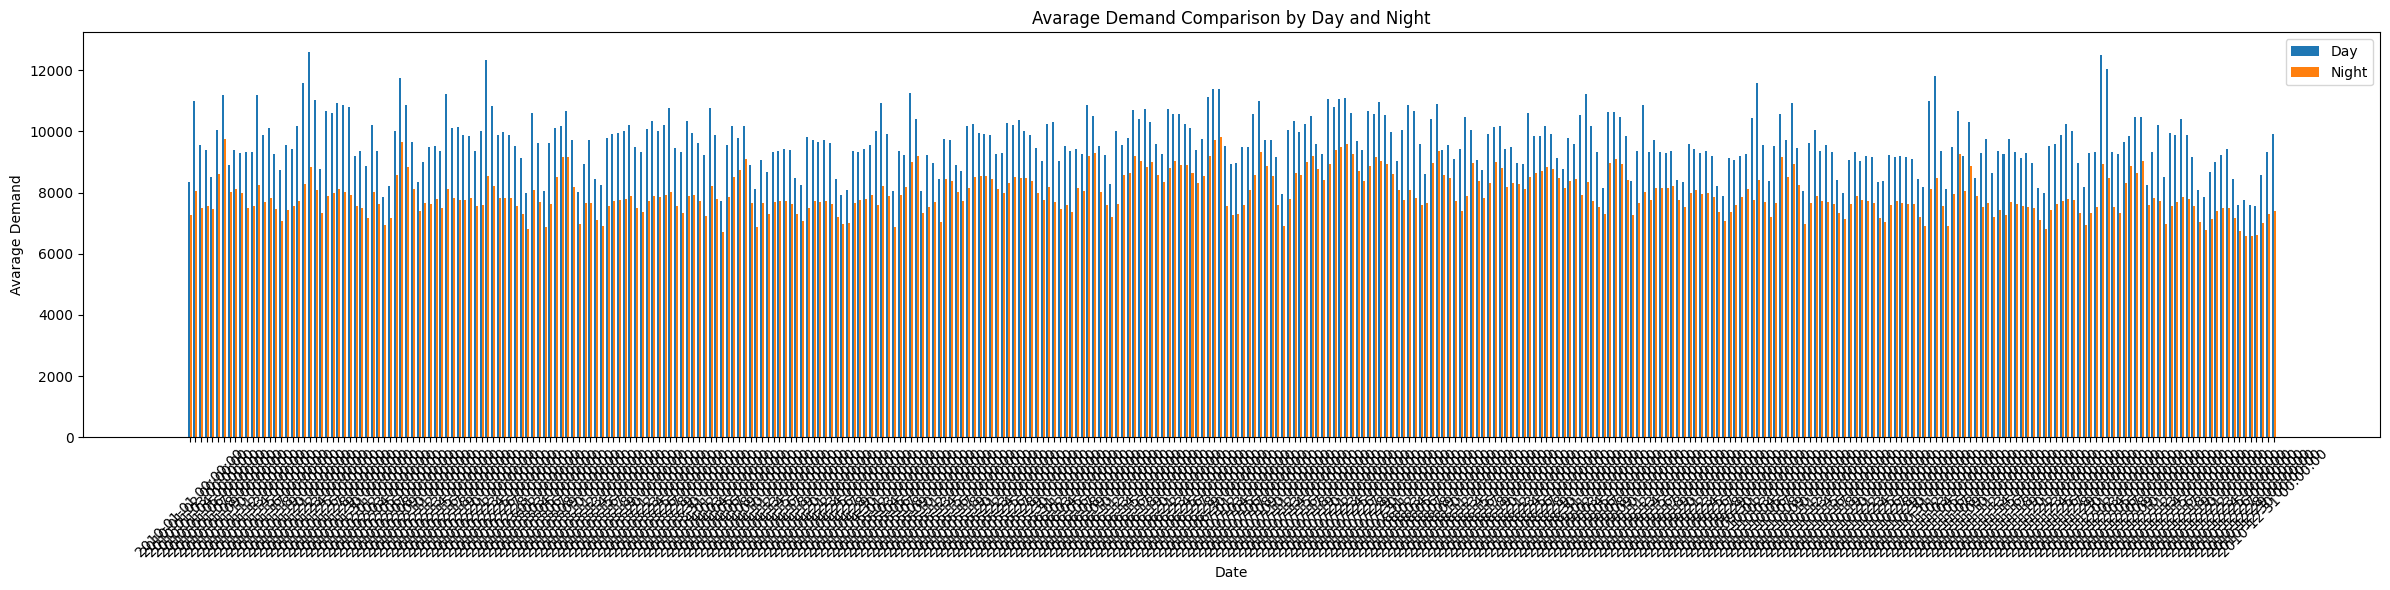

In [ ]:

# Pivot the DataFrame to get 'day' and 'night' as separate columns for each date
pivot_data = grouped_data.pivot(index='DATETIME', columns='Period', values='AverageDemand').reset_index()
pivot_data['DATETIME'] = pd.to_datetime(pivot_data['DATETIME'])
print(pivot_data.head())

# Define your start and end years here
start_year = 2010  # Example: 2020
end_year = 2010    # Example: 2022

# Filter the data to include only the rows within the specified period
pivot_data = pivot_data[(pivot_data['DATETIME'].dt.year >= start_year) & (pivot_data['DATETIME'].dt.year <= end_year)]
print(pivot_data)


# Plotting
fig, ax = plt.subplots(figsize=(24, 6))

# X-axis positions of the groups
ind = range(len(pivot_data))

# Bar width
bar_width = 0.35

# Plotting both 'day' and 'night' bars
day_bars = ax.bar(ind, pivot_data['day'], bar_width, label='Day')
night_bars = ax.bar([p + bar_width for p in ind], pivot_data['night'], bar_width, label='Night')

# Labeling and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Avarage Demand')
ax.set_title('Avarage Demand Comparison by Day and Night')
ax.set_xticks([p + bar_width / 2 for p in ind])
ax.set_xticklabels(pivot_data['DATETIME'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



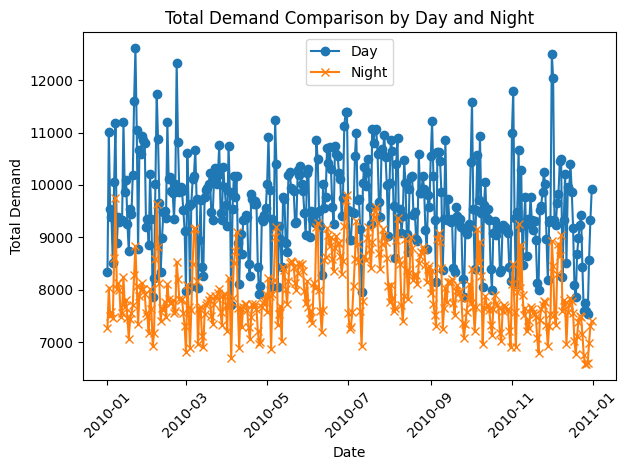

In [ ]:
# Plot each period as a separate line
plt.plot(pivot_data['DATETIME'], pivot_data['day'], label='Day', marker='o')
plt.plot(pivot_data['DATETIME'], pivot_data['night'], label='Night', marker='x')

# Labeling and aesthetics
plt.title('Total Demand Comparison by Day and Night')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

plt.show()